## 4.10 Coding Etiquette & Excel Reporting

### Contents

### 1.  Importing libraries and files
### 2.  Data security
### 3.  Create a regional segmentation using if-statement with for-loop
### 4.  Crosstab 'Region' vs 'spending_flag
### - Use loc function to create an exclusion flag for low-activity customers
### 5. Creating a profiling variable
### - Age variable
### - Income variable
### - Number of dependents variable
### - Family status variable
### 6. Create an appropriate visualization 
### - Age group visualization
### - Income group visualization
### - Dependents flag visualization
### - Family status visualization
### 7. Aggregate the max, mean, and min variables
### - Age group metric
### - Income group metric
### - Number of dependents metric
### 8. Comparing customer profiles
### 8.1 Regions vs departments
### 8.2 Age group metric
### - Age group vs regions
### - Age group vs departments
### 8.3 Income group metric
### - Income group vs regions
### - Income group vs departments
### 8.4 Number of dependents metric
### - Number of dependents vs regions
### - Number of dependents vs departments
### 8.5 Family status metric
### - Family status vs regions
### - Family status vs departments
### 9. Exporing all charts

#### 1. Import the data set you exported in Exercise 4.9 into a new Jupyter notebook. This should be the merged version of your data that contains the new customers column.

In [1]:
# Calling functions from the libraries we installed
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
import scipy

In [2]:
path = r'C:\Users\boss4048\Documents\10-2024 Instacart Basket Analysis'

In [3]:
df = pd.read_pickle(os.path.join(path, '02 Data', 'Prepared Data', '4.9 Cleaned dataframe.pkl'))

#### 2. Consider any security implications that might exist for this new data. You’ll need to address any PII data in the data before continuing your analysis.

The dataframe we just imported contains sensitive columns that could potentially be traced back to a particular person, so I am dropping those columns which are 'First Name' and 'Last Name' Additionally I would drop unnecessary columns (_merge) as well that we would not use to save executing times and save me from memery errors.

In [4]:
# Drop columns for data security and an unnecessary column.
instacart = df.drop(columns = ['First Name', 'Last Name', '_merge'])

In [5]:
instacart.head()

,order_id,user_id,order_number,orders_day_of_week,order_hour_of_day,total_days_since_last_order,product_id,add_to_cart_order,reordered,product_name,...,loyalty_flag,spending_flag,frequency_flag,Gender,State,Age,Date Joined,Number of Dependents,Family Status,Income
0,2539329,1,1,2,8,NaN,196,1,0,Soda,...,New customer,Low spender,Non-frequent customer,Female,Alabama,31,2/17/2019,3,married,40423
1,2539329,1,1,2,8,NaN,14084,2,0,Organic Unsweetened Vanilla Almond Milk,...,New customer,Low spender,Non-frequent customer,Female,Alabama,31,2/17/2019,3,married,40423
2,2539329,1,1,2,8,NaN,12427,3,0,Original Beef Jerky,...,New customer,Low spender,Non-frequent customer,Female,Alabama,31,2/17/2019,3,married,40423
3,2539329,1,1,2,8,NaN,26088,4,0,Aged White Cheddar Popcorn,...,New customer,Low spender,Non-frequent customer,Female,Alabama,31,2/17/2019,3,married,40423
4,2539329,1,1,2,8,NaN,26405,5,0,XL Pick-A-Size Paper Towel Rolls,...,New customer,Low spender,Non-frequent customer,Female,Alabama,31,2/17/2019,3,married,40423


#### 3. The Instacart officers are interested in comparing customer behavior in different geographic areas. Create a regional segmentation of the data. You’ll need to create a “Region” column based on the “State” column from your customers data set.

- Use the region information in this Wikipedia article to create your column (you only need to create regions, not divisions).

Use if-Statements

In [6]:
result = []
for value in instacart['State']:
    if value in ('Maine', 'New Hampshire', 'Vermont', 'Massachusetts', 'Rhode Island', 'Connecticut', 'New York', 'Pennsylvania', 'New Jersey') :
        result.append('Northeast')
    elif value in ('Wisconsin', 'Michigan', 'Illinois', 'Indiana', 'Ohio', 'North Dakota', 'South Dakota', 'Nebraska', 'Kansas', 'Minnesota', 'Iowa', 'Missouri') :
        result.append('Midwest')
    elif value in ('Delaware', 'Maryland', 'District of Columbia', 'Virginia', 'West Virginia', 'North Carolina', 'South Carolina', 'Georgia', 'Florida', 'Kentucky', 'Tennessee', 'Mississippi', 'Alabama', 'Oklahoma', 'Texas', 'Arkansas', 'Louisiana') :
        result.append('South')
    elif value in ('Idaho', 'Montana', 'Wyoming', 'Nevada', 'Utah', 'Colorado', 'Arizona', 'New Mexico', 'Alaska', 'Washington', 'Oregon', 'California', 'Hawaii') :        
        result.append('West')
    else :
        result.append('Not a region')

In [7]:
instacart['Region'] = result
instacart['Region'].value_counts()

Region
South        10791885
West          8292913
Midwest       7597325
Northeast     5722736
Name: count, dtype: int64

- Determine whether there’s a difference in spending habits between the different U.S. regions. (Hint: You can do this by crossing the variable you just created with the spending flag.)

In [8]:
crosstab = pd.crosstab(instacart['Region'], instacart['spending_flag'], dropna = False)

In [9]:
crosstab

spending_flag,High spender,Low spender
Region,,
Midwest,155975,7441350
Northeast,108225,5614511
South,209691,10582194
West,160354,8132559


Determine whether there’s a difference in spending habits between the different U.S. regions.

Below are the proportions by population for each region. All regions have similar numbers when compared to each other. However, the results indicate that the Midwest region has the highest spending habit rate (high spender) at 2.05%, while the Northeast region has the highest ratio of low spending habits (low spender) at 98.11%.

Midwest:   High spender = 2.05%, Low spender = 97.95%

Northeast: High spender = 1.89%, Low spender = 98.11%

South:     High spender = 1.94%, Low spender = 98.06%

West:      High spender = 1.93%, Low spender = 98.07%

#### 4.The Instacart CFO isn’t interested in customers who don’t generate much revenue for the app. Create an exclusion flag for low-activity customers (customers with less than 5 orders) and exclude them from the data. Make sure you export this sample.

Create max_order column by using groupby() to find out max order on each user_id.

In [10]:
instacart['max_order'] = instacart.groupby(['user_id'])['order_number'].transform(np.max)

C:\Users\boss4048\AppData\Local\Temp\ipykernel_11996\1320499603.py:1: FutureWarning: The provided callable <function max at 0x0000025B8CECFBA0> is currently using SeriesGroupBy.max. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "max" instead.
  instacart['max_order'] = instacart.groupby(['user_id'])['order_number'].transform(np.max)


Use loc function to create an exclusion flag for low-activity customers.

In [11]:
instacart.loc[instacart['max_order'] >= 5, 'exclusion flag'] = 'High-activity customers'

In [12]:
instacart.loc[instacart['max_order'] < 5, 'exclusion flag'] = 'Low-activity customers'

In [13]:
instacart['exclusion flag'].value_counts()

exclusion flag
High-activity customers    30964564
Low-activity customers      1440295
Name: count, dtype: int64

Use subsetting method to filter out low-activity customers.

In [14]:
low_activity_customers = instacart[instacart['exclusion flag'] == 'Low-activity customers']
high_activity_customers = instacart[instacart['exclusion flag'] == 'High-activity customers']

In [15]:
# Export both dataframes (low_activity_customers, high_activity_customers) in case we need to pull the data for future analysis
low_activity_customers.to_pickle(os.path.join(path, '02 Data', 'Prepared Data', '4.10 low_activity_customers.pkl'))
high_activity_customers.to_pickle(os.path.join(path, '02 Data', 'Prepared Data', '4.10 high_activity_customers.pkl'))

In [16]:
# Use a clear variable for this project
instacart_cleaned = high_activity_customers

In [17]:
instacart_cleaned.shape

(30964564, 27)

#### 5. Create a profiling variable based on age, income, certain goods in the “department_id” column, and number of dependents. You might also use the “orders_day_of_week” and “order_hour_of_day” columns if you can think of a way they would impact customer profiles. (Hint: As an example, try thinking of what characteristics would lead you to the profile “Single adult” or “Young parent.”)

#### 5.1 Age variable
Young: < 25 years old

Adult: 25–39 years old 

Middle age adult: 40–64 years old 

Senior: >= 65 years

In [18]:
# Use loc() function
instacart_cleaned.loc[instacart_cleaned['Age'] < 25, 'Age_group'] = 'Young'

C:\Users\boss4048\AppData\Local\Temp\ipykernel_11996\4171361136.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  instacart_cleaned.loc[instacart_cleaned['Age'] < 25, 'Age_group'] = 'Young'


In [19]:
instacart_cleaned.loc[(instacart_cleaned['Age'] >= 25) & (instacart_cleaned['Age'] < 40), 'Age_group'] = 'Adult'

In [20]:
instacart_cleaned.loc[(instacart_cleaned['Age'] >= 40) & (instacart_cleaned['Age'] < 65), 'Age_group'] = 'Middle age adult'

In [21]:
instacart_cleaned.loc[instacart_cleaned['Age'] >= 65, 'Age_group'] = 'Senior'

In [22]:
# Check the counts of each value on Age_group column
instacart_cleaned['Age_group'].value_counts()

Age_group
Middle age adult    12103910
Senior               8195544
Adult                7249916
Young                3415194
Name: count, dtype: int64

#### 5.2 Income variable

Low income: $0 - $49,999

Medium income: $50,000- $99,999

High income: > $100,000

In [23]:
# Use loc() function
instacart_cleaned.loc[instacart_cleaned['Income'] < 50000, 'Income_group'] = 'Low income'

C:\Users\boss4048\AppData\Local\Temp\ipykernel_11996\206876016.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  instacart_cleaned.loc[instacart_cleaned['Income'] < 50000, 'Income_group'] = 'Low income'


In [24]:
instacart_cleaned.loc[(instacart_cleaned['Income'] >= 50000) & (instacart_cleaned['Income'] < 100000), 'Income_group'] = 'Medium income'

In [25]:
instacart_cleaned.loc[instacart_cleaned['Income'] > 100000, 'Income_group'] = 'High income'

In [26]:
instacart_cleaned['Income_group'].value_counts()

Income_group
High income      14207028
Medium income    13394608
Low income        3362554
Name: count, dtype: int64

#### 5.3 Number of dependents variable

Don't have dependents: 0

Have dependents: > 0

In [27]:
# Use loc() function
instacart_cleaned.loc[instacart_cleaned['Number of Dependents'] > 0, 'dependents_flag'] = 'Have dependents'

C:\Users\boss4048\AppData\Local\Temp\ipykernel_11996\1267108060.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  instacart_cleaned.loc[instacart_cleaned['Number of Dependents'] > 0, 'dependents_flag'] = 'Have dependents'


In [28]:
instacart_cleaned.loc[instacart_cleaned['Number of Dependents'] == 0, 'dependents_flag'] = 'No dependents'

In [29]:
instacart_cleaned['dependents_flag'].value_counts()

dependents_flag
Have dependents    23224883
No dependents       7739681
Name: count, dtype: int64

Check the dataframe if the newest 3 columns (Age_group, Income_group, dependents_flag) are displayed correctly.

In [30]:
instacart_cleaned.head()

,order_id,user_id,order_number,orders_day_of_week,order_hour_of_day,total_days_since_last_order,product_id,add_to_cart_order,reordered,product_name,...,Date Joined,Number of Dependents,Family Status,Income,Region,max_order,exclusion flag,Age_group,Income_group,dependents_flag
0,2539329,1,1,2,8,NaN,196,1,0,Soda,...,2/17/2019,3,married,40423,South,10,High-activity customers,Adult,Low income,Have dependents
1,2539329,1,1,2,8,NaN,14084,2,0,Organic Unsweetened Vanilla Almond Milk,...,2/17/2019,3,married,40423,South,10,High-activity customers,Adult,Low income,Have dependents
2,2539329,1,1,2,8,NaN,12427,3,0,Original Beef Jerky,...,2/17/2019,3,married,40423,South,10,High-activity customers,Adult,Low income,Have dependents
3,2539329,1,1,2,8,NaN,26088,4,0,Aged White Cheddar Popcorn,...,2/17/2019,3,married,40423,South,10,High-activity customers,Adult,Low income,Have dependents
4,2539329,1,1,2,8,NaN,26405,5,0,XL Pick-A-Size Paper Towel Rolls,...,2/17/2019,3,married,40423,South,10,High-activity customers,Adult,Low income,Have dependents


#### 5.4 Family status variable

- Married

- Single

- Divorced/Widowed

- Living with parents and siblings 

In [31]:
instacart_cleaned['Family Status'].value_counts()

Family Status
married                             21743711
single                               5094410
divorced/widowed                     2645271
living with parents and siblings     1481172
Name: count, dtype: int64

#### 6. Create an appropriate visualization to show the distribution of profiles.

I decided to visualize those 3 variables with pie chart because it is best for showing proportions of a whole.

#### 6.1 Age_group visualization

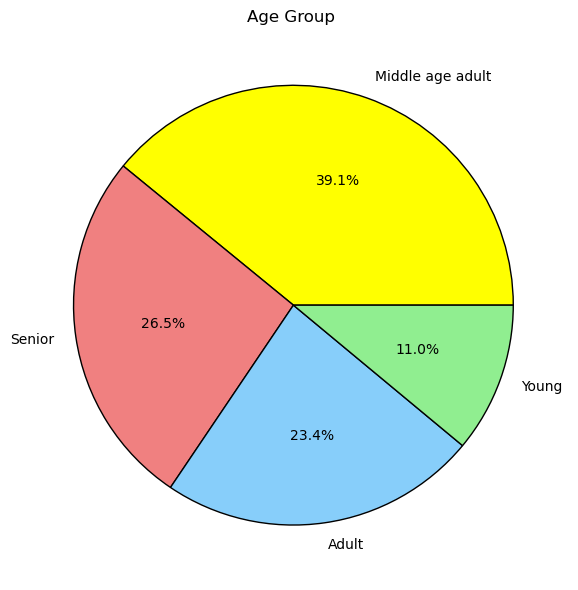

In [32]:
pie_age_group = instacart_cleaned['Age_group'].value_counts()
plt.figure(figsize=(6,6))
colors = ['yellow', 'lightcoral', 'lightskyblue', 'lightgreen']
pie_age_group = pie_age_group.plot.pie(autopct='%1.1f%%',wedgeprops={'edgecolor':'black'}, colors = colors)
plt.title('Age Group ')
plt.ylabel('')
plt.tight_layout()
plt.show()

Export the pie chart of age group

In [33]:
pie_age_group.figure.savefig(os.path.join(path,'04 Analysis','Visualizations', '4.10.1 pie_age_group.png'))

#### 6.2 Income group visualization

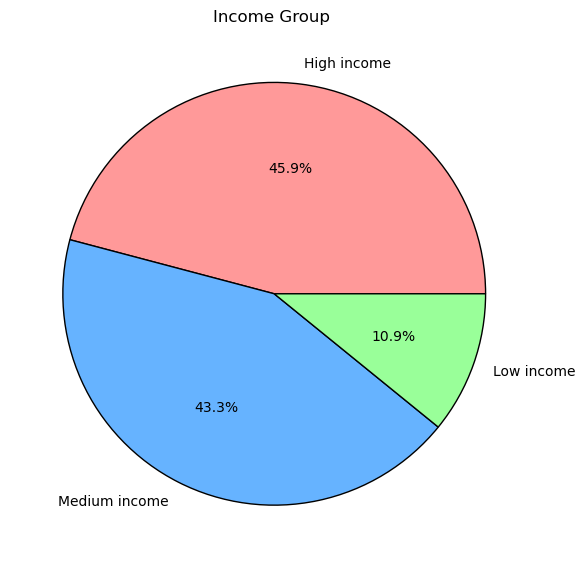

In [34]:
pie_income_group = instacart_cleaned['Income_group'].value_counts()
plt.figure(figsize=(6,6))
colors = ['#ff9999', '#66b3ff', '#99ff99']
pie_income_group = pie_income_group.plot.pie(autopct='%1.1f%%',wedgeprops={'edgecolor':'black'}, colors = colors)
plt.title('Income Group ')
plt.ylabel('')
plt.tight_layout()
plt.show()

Export the pie chart of income group

In [35]:
pie_income_group.figure.savefig(os.path.join(path,'04 Analysis','Visualizations', '4.10.2 pie_income_group.png'))

#### 6.3 Dependents flag visualization

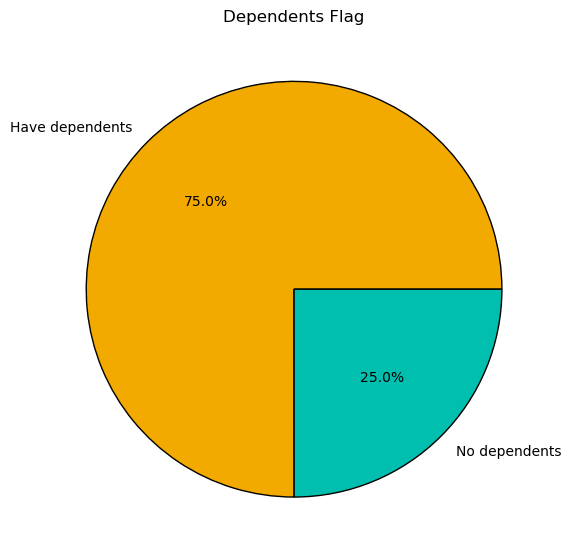

In [36]:
pie_dependents_flag = instacart_cleaned['dependents_flag'].value_counts()
plt.figure(figsize=(6,6))
colors = ['#f2a900', '#00bfae']
pie_dependents_flag = pie_dependents_flag.plot.pie(autopct='%1.1f%%',wedgeprops={'edgecolor':'black'}, colors = colors)
plt.title('Dependents Flag')
plt.ylabel('')
plt.tight_layout()
plt.show()

Export the pie chart of dependents flag

In [37]:
pie_dependents_flag.figure.savefig(os.path.join(path,'04 Analysis','Visualizations', '4.10.3 pie_dependents_flag.png'))

#### 6.4 Family status visualization

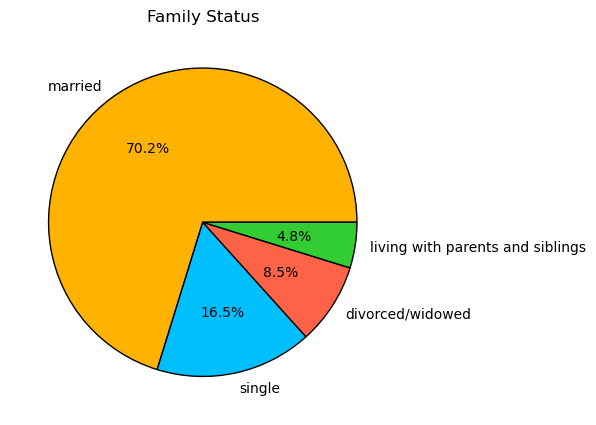

In [38]:
pie_family_status = instacart_cleaned['Family Status'].value_counts()
plt.figure(figsize=(6,6))
colors = ['#FFB300', '#00BFFF', '#FF6347', '#32CD32']
pie_family_status = pie_family_status.plot.pie(autopct='%1.1f%%',wedgeprops={'edgecolor':'black'}, colors = colors)
plt.title('Family Status')
plt.ylabel('')
plt.tight_layout()
plt.show()

Export the pie chart of family status

In [39]:
pie_family_status.figure.savefig(os.path.join(path,'04 Analysis','Visualizations', '4.10.4 pie_family_status.png'))

#### 7. Aggregate the max, mean, and min variables on a customer-profile level for usage frequency and expenditure.

#### 7.1 Age group metric

- Group by for prices variable

In [40]:
instacart_cleaned.groupby('Age_group').agg({'prices': ['mean', 'min', 'max']})

prices              
                       mean  min      max
Age_group                                
Adult             11.872415  1.0  99999.0
Middle age adult  11.944899  1.0  99999.0
Senior            11.757768  1.0  99999.0
Young             12.444676  1.0  99999.0

Young people has the highest average prices compared to other age groups.

- Group by for total_days_since_last_order variable

In [41]:
instacart_cleaned.groupby('Age_group').agg({'total_days_since_last_order': ['mean', 'min', 'max']})

total_days_since_last_order           
                                        mean  min   max
Age_group                                              
Adult                              10.834014  0.0  30.0
Middle age adult                   10.821972  0.0  30.0
Senior                             10.791788  0.0  30.0
Young                              10.762997  0.0  30.0

Adult age group has the highest average total_days_since_last_order compared to other age groups.

#### 7.2 Income group metric

- Group by for prices variable

In [42]:
instacart_cleaned.groupby('Income_group').agg({'prices': ['mean', 'min', 'max']})

prices              
                    mean  min      max
Income_group                          
High income    16.461733  1.0  99999.0
Low income      6.707347  1.0     25.0
Medium income   8.442739  1.0  99999.0

High income group has the highest average prices compared to other groups which means they spend more money when purchasing items from Instacart.

- Group by for total_days_since_last_order variable

In [43]:
instacart_cleaned.groupby('Income_group').agg({'total_days_since_last_order': ['mean', 'min', 'max']})

total_days_since_last_order           
                                     mean  min   max
Income_group                                        
High income                     10.769663  0.0  30.0
Low income                      11.175808  0.0  30.0
Medium income                   10.762150  0.0  30.0

High and medium income groups have similar average prices which means they order items from Instacart more often than people in low income group.

#### 7.3 Number of dependents metric

- Group by for prices variable

In [44]:
instacart_cleaned.groupby('dependents_flag').agg({'prices': ['mean', 'min', 'max']})

prices              
                      mean  min      max
dependents_flag                         
Have dependents  11.877157  1.0  99999.0
No dependents    12.102657  1.0  99999.0

People with no dependents have higher average prices than people with dependents.

- Group by for total_days_since_last_order variable

In [45]:
instacart_cleaned.groupby('dependents_flag').agg({'total_days_since_last_order': ['mean', 'min', 'max']})

total_days_since_last_order           
                                       mean  min   max
dependents_flag                                       
Have dependents                   10.816416  0.0  30.0
No dependents                     10.791951  0.0  30.0

People with no dependents have slightly higher average total days since last order than people with dependents.

#### 8. Compare your customer profiles with regions and departments. Can you identify a link between them? Customers may demonstrate different behaviors across regions, which could make this information important.

8.1 Regions vs departments

8.2 Age group metric

- Age group vs regions

- Age group vs departments

8.3 Income group metric
  
- Income group vs regions

- Income group vs departments

8.4 Number of dependents metric
  
- Number of dependents vs regions

- Number of dependents vs departments

8.5 Family status metric

- Family status vs regions

- Family status vs departments

#### 8.1 Regions vs departments

In [46]:
# Import departments dataframe
departments = pd.read_csv(os.path.join(path, '02 Data', 'Prepared Data', 'departments_wrangled.csv'))

In [47]:
departments.head()

,Unnamed: 0,department
0,1,frozen
1,2,other
2,3,bakery
3,4,produce
4,5,alcohol


In [48]:
# Rename the unnamed column which is the key column that we can use it to merge with our main dataframe.
departments.rename(columns = {'Unnamed: 0' : 'department_id'}, inplace = True)

In [49]:
departments

,department_id,department
0,1,frozen
1,2,other
2,3,bakery
3,4,produce
4,5,alcohol
5,6,international
6,7,beverages
7,8,pets
8,9,dry goods pasta
9,10,bulk


Check datatype from 2 dataframes. They need to be the same before merging.

In [50]:
instacart_cleaned['department_id'].dtype

dtype('int32')

In [51]:
departments['department_id'].dtype

dtype('int64')

In [52]:
# Change data type of departments['department_id'] to int32.
departments['department_id'].astype('int32')

0      1
1      2
2      3
3      4
4      5
5      6
6      7
7      8
8      9
9     10
10    11
11    12
12    13
13    14
14    15
15    16
16    17
17    18
18    19
19    20
20    21
Name: department_id, dtype: int32

Merge 2 dataframes

In [53]:
instacart_merged = instacart_cleaned.merge(departments, on = ['department_id'], indicator = True)

In [54]:
instacart_merged.head()

,order_id,user_id,order_number,orders_day_of_week,order_hour_of_day,total_days_since_last_order,product_id,add_to_cart_order,reordered,product_name,...,Family Status,Income,Region,max_order,exclusion flag,Age_group,Income_group,dependents_flag,department,_merge
0,2539329,1,1,2,8,NaN,196,1,0,Soda,...,married,40423,South,10,High-activity customers,Adult,Low income,Have dependents,beverages,both
1,2539329,1,1,2,8,NaN,14084,2,0,Organic Unsweetened Vanilla Almond Milk,...,married,40423,South,10,High-activity customers,Adult,Low income,Have dependents,dairy eggs,both
2,2539329,1,1,2,8,NaN,12427,3,0,Original Beef Jerky,...,married,40423,South,10,High-activity customers,Adult,Low income,Have dependents,snacks,both
3,2539329,1,1,2,8,NaN,26088,4,0,Aged White Cheddar Popcorn,...,married,40423,South,10,High-activity customers,Adult,Low income,Have dependents,snacks,both
4,2539329,1,1,2,8,NaN,26405,5,0,XL Pick-A-Size Paper Towel Rolls,...,married,40423,South,10,High-activity customers,Adult,Low income,Have dependents,household,both


In [55]:
region_vs_department = pd.crosstab(instacart_merged['department'], instacart_merged['Region'], dropna = False)

In [56]:
region_vs_department

Region,Midwest,Northeast,South,West
department,,,,
alcohol,34043,25017,48813,36754
babies,95741,72712,139511,102428
bakery,261753,199300,371620,288155
beverages,598979,462929,859419,650574
breakfast,156155,117904,223172,173619
bulk,7929,5599,11180,8743
canned goods,237459,176936,337458,260221
dairy eggs,1212490,914616,1723016,1327060
deli,234464,178398,333620,257352


Now we can see the comparison of each region vs each department.

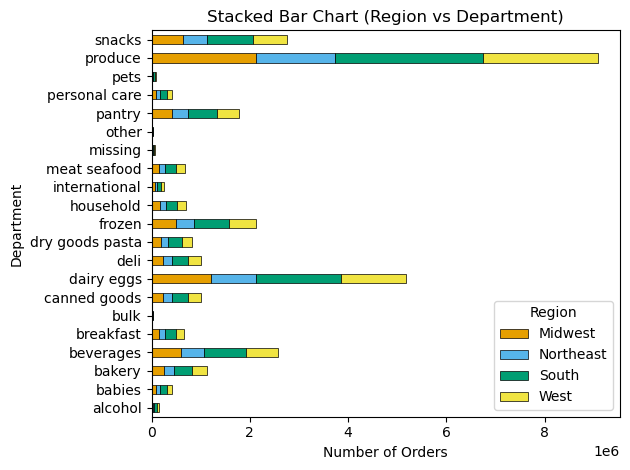

In [57]:
colors = ['#E69F00', '#56B4E9', '#009E73', '#F0E442']
region_vs_department = region_vs_department.plot.barh(stacked =True, color = colors, edgecolor='black', linewidth=0.5)
# Adding labels and title
plt.xlabel('Number of Orders')
plt.ylabel('Department')
plt.title('Stacked Bar Chart (Region vs Department)')
plt.legend(title='Region')
plt.tight_layout()  # Adjust layout

##### South and west regions have the highest numbers in each department.

Highest: Produce department and south region

Lowest: Bulk department and northeast region

#### 8.2 Age group metric

#### - Age group vs regions

In [58]:
age_vs_region = pd.crosstab(instacart_merged['Age_group'], instacart_merged['Region'], dropna = False)

In [59]:
age_vs_region

Region,Midwest,Northeast,South,West
Age_group,,,,
Adult,1691375,1268947,2443111,1846483
Middle age adult,2874466,2108141,3994431,3126872
Senior,1904046,1484807,2708461,2098230
Young,791626,602790,1165136,855642


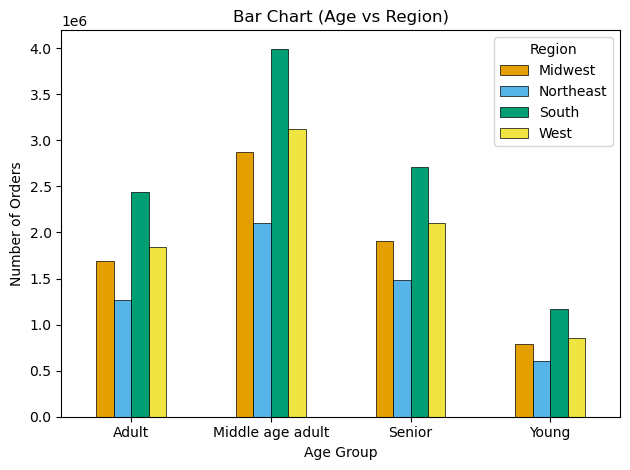

In [60]:
colors = ['#E69F00', '#56B4E9', '#009E73', '#F0E442']
age_vs_region = age_vs_region.plot.bar(edgecolor='black', color = colors, linewidth=0.5)
# Adding labels and title
plt.xlabel('Age Group')
plt.xticks(rotation=360)
plt.ylabel('Number of Orders')
plt.title('Bar Chart (Age vs Region)')
plt.legend(title='Region')
plt.tight_layout()  # Adjust layout

##### Middle age adult has the highest number of orders comparing to other age groups, and south region has the highest number of orders comparing to other regions.

Highest: Middle age adult and midwest

Lowest: Young and south

#### - Age group vs departments

In [61]:
age_vs_department = pd.crosstab(instacart_merged['department'], instacart_merged['Age_group'], dropna = False)

In [62]:
age_vs_department

Age_group,Adult,Middle age adult,Senior,Young
department,,,,
alcohol,34179,56278,36693,17477
babies,95631,162732,106204,45825
bakery,262420,438829,295997,123582
beverages,594917,1013708,684020,279256
breakfast,156491,263615,175296,75448
bulk,7857,12882,8945,3767
canned goods,238122,394849,267509,111594
dairy eggs,1220151,2015807,1368072,573152
deli,235873,392790,265199,109972


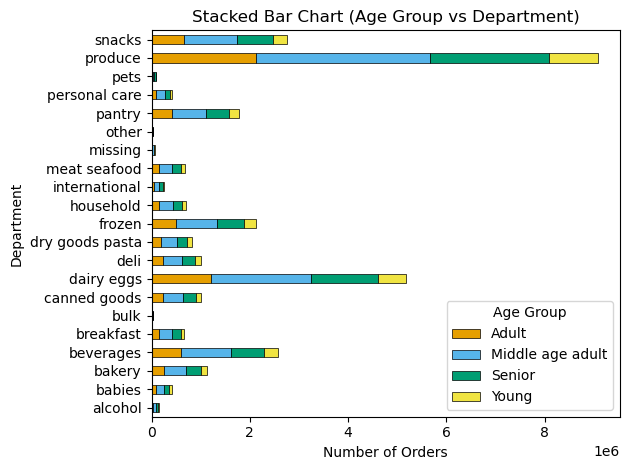

In [63]:
colors = ['#E69F00', '#56B4E9', '#009E73', '#F0E442']
age_vs_department = age_vs_department.plot.barh(stacked =True, color = colors, edgecolor='black', linewidth=0.5)
# Adding labels and title
plt.xlabel('Number of Orders')
plt.ylabel('Department')
plt.title('Stacked Bar Chart (Age Group vs Department)')
plt.legend(title='Age Group')
plt.tight_layout()  # Adjust layout

##### Middle age adult has the highest number of orders on produce department.

Highest: Middle age adult and produce department

Lowest: Young and bulk department

#### 8.3 Income group metric

#### - Income group vs regions

In [64]:
income_vs_region = pd.crosstab(instacart_merged['Income_group'], instacart_merged['Region'], dropna = True)

In [65]:
income_vs_region

Region,Midwest,Northeast,South,West
Income_group,,,,
High income,3400093,2516484,4663571,3626880
Low income,783764,587137,1142572,849081
Medium income,3077656,2361064,4504622,3451266


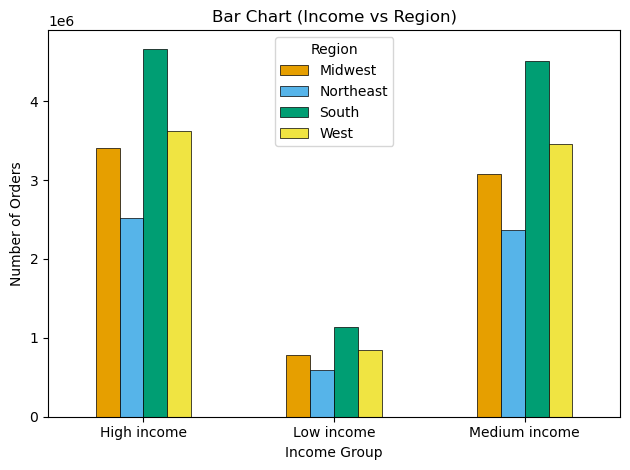

In [66]:
colors = ['#E69F00', '#56B4E9', '#009E73', '#F0E442']
income_vs_region = income_vs_region.plot.bar(edgecolor='black', color = colors, linewidth=0.5)
# Adding labels and title
plt.xlabel('Income Group')
plt.xticks(rotation=360)
plt.ylabel('Number of Orders')
plt.title('Bar Chart (Income vs Region)')
plt.legend(title='Region')
plt.tight_layout()  # Adjust layout

##### High income has the highest number of orders compared to other income groups.

Highest: High income and south region

Lowest: Low income and northeast region

#### - Income group vs departments

In [67]:
income_vs_department = pd.crosstab(instacart_merged['department'], instacart_merged['Income_group'], dropna = True)

In [68]:
income_vs_department

Income_group,High income,Low income,Medium income
department,,,
alcohol,69142,18047,57438
babies,196696,29240,184448
bakery,527703,106757,486360
beverages,1126437,383121,1062318
breakfast,297594,91408,281846
bulk,14218,4676,14557
canned goods,485226,78975,447846
dairy eggs,2406160,502363,2268608
deli,462089,106448,435287


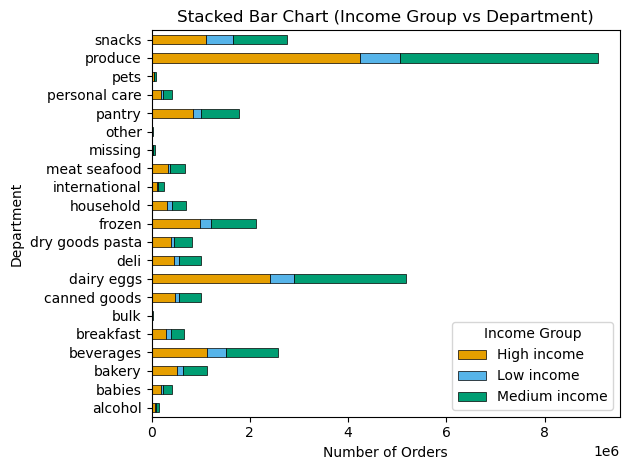

In [69]:
colors = ['#E69F00', '#56B4E9', '#009E73', '#F0E442']
income_vs_department = income_vs_department.plot.barh(stacked =True, color = colors, edgecolor='black', linewidth=0.5)
# Adding labels and title
plt.xlabel('Number of Orders')
plt.ylabel('Department')
plt.title('Stacked Bar Chart (Income Group vs Department)')
plt.legend(title='Income Group')
plt.tight_layout()  # Adjust layout

#### High income group has the highest number of orders compared to other groups.

Highest: High income and produce department

Lowest: Low income and other department

#### 8.4 Number of dependents metric

#### - Number of dependents vs regions

In [70]:
dependents_vs_region = pd.crosstab(instacart_merged['dependents_flag'], instacart_merged['Region'], dropna = False)

In [71]:
dependents_vs_region

Region,Midwest,Northeast,South,West
dependents_flag,,,,
Have dependents,5438697,4110203,7729206,5946777
No dependents,1822816,1354482,2581933,1980450


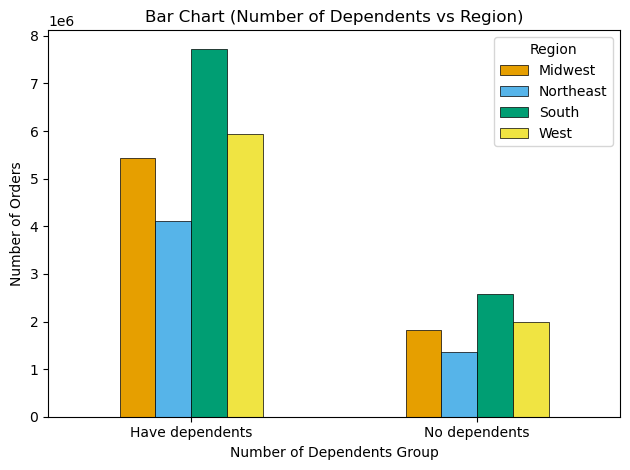

In [72]:
colors = ['#E69F00', '#56B4E9', '#009E73', '#F0E442']
dependents_vs_region = dependents_vs_region.plot.bar(edgecolor='black', color = colors, linewidth=0.5)
# Adding labels and title
plt.xlabel('Number of Dependents Group')
plt.xticks(rotation=360)
plt.ylabel('Number of Orders')
plt.title('Bar Chart (Number of Dependents vs Region)')
plt.legend(title='Region')
plt.tight_layout()  # Adjust layout

##### People with dependents are more likely to purchase items at Instacart more than people without dependents.

Highest: People with dependents and south region

Lowest: People without dependents and northeast region

#### - Number of dependents vs departments

In [73]:
dependents_vs_department = pd.crosstab(instacart_merged['department'], instacart_merged['dependents_flag'], dropna = False)

In [74]:
dependents_vs_department

dependents_flag,Have dependents,No dependents
department,,
alcohol,107800,36827
babies,307064,103328
bakery,839433,281395
beverages,1926560,645341
breakfast,504418,166432
bulk,25451,8000
canned goods,761054,251020
dairy eggs,3882806,1294376
deli,750452,253382


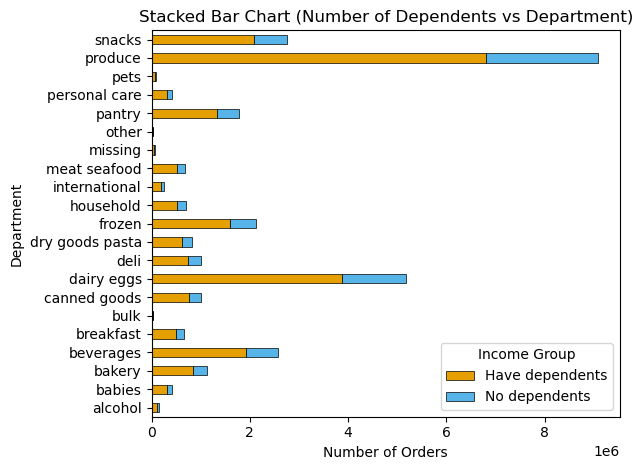

In [75]:
colors = ['#E69F00', '#56B4E9']
dependents_vs_department = dependents_vs_department.plot.barh(stacked =True, color = colors, edgecolor='black', linewidth=0.5)
# Adding labels and title
plt.xlabel('Number of Orders')
plt.ylabel('Department')
plt.title('Stacked Bar Chart (Number of Dependents vs Department)')
plt.legend(title='Income Group')
plt.tight_layout()  # Adjust layout

##### People with dependents are more likely to purchase items at Instacart more than people without dependents.

Highest: People with dependents and produce department

Lowest: People without dependents and bulk department

#### 8.5 Family status metric

#### - Family status vs regions



In [76]:
family_status_vs_region = pd.crosstab(instacart_merged['Family Status'], instacart_merged['Region'], dropna = False)

In [77]:
family_status_vs_region

Region,Midwest,Northeast,South,West
Family Status,,,,
divorced/widowed,617198,478767,877314,671992
living with parents and siblings,351435,256430,505457,367850
married,5087262,3853773,7223749,5578927
single,1205618,875715,1704619,1308458


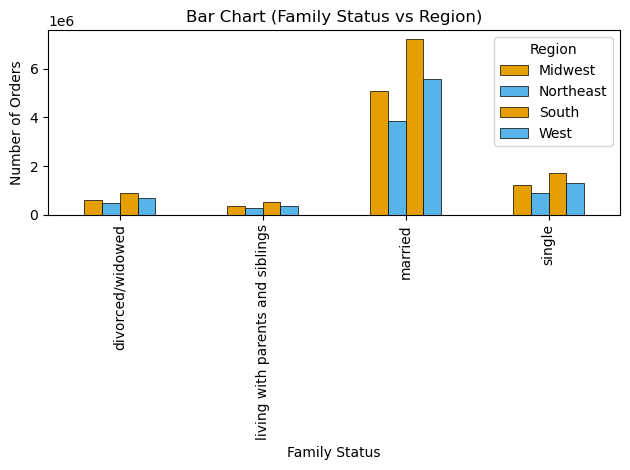

In [78]:
family_status_vs_region = family_status_vs_region.plot.bar(edgecolor='black', color = colors, linewidth=0.5)
# Adding labels and title
plt.xlabel('Family Status')
plt.ylabel('Number of Orders')
plt.title('Bar Chart (Family Status vs Region)')
plt.legend(title='Region')
plt.tight_layout()  # Adjust layout

##### People with married status have the highest number of orders, and it has much more than other groups of family status.

Highest: People with married status and south region

Lowest: People who are living with parents and siblings and northeast region

#### - Family status vs departments

In [79]:
family_status_vs_department = pd.crosstab(instacart_merged['department'], instacart_merged['Family Status'], dropna = False)

In [80]:
family_status_vs_department

Family Status,divorced/widowed,living with parents and siblings,married,single
department,,,,
alcohol,11859,8379,99421,24968
babies,34351,19381,287683,68977
bakery,95735,53684,785749,185660
beverages,220879,119107,1807453,424462
breakfast,56590,33198,471220,109842
bulk,2676,1633,23818,5324
canned goods,84268,48477,712577,166752
dairy eggs,442602,250207,3632599,851774
deli,86749,48119,702333,166633


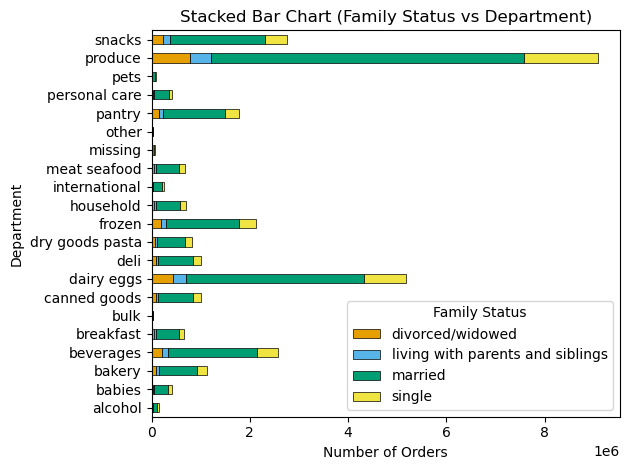

In [81]:
colors = ['#E69F00', '#56B4E9', '#009E73', '#F0E442']
family_status_vs_department = family_status_vs_department.plot.barh(stacked =True, color = colors, edgecolor='black', linewidth=0.5)
# Adding labels and title
plt.xlabel('Number of Orders')
plt.ylabel('Department')
plt.title('Stacked Bar Chart (Family Status vs Department)')
plt.legend(title='Family Status')
plt.tight_layout()  # Adjust layout

##### People with married status have the highest number of orders than other family status groups.

Highest: People with married status and produce department

Lowest: People who are living with parents and siblings and bulk department

#### Additional analysis for the Instacart project

- Plot a bar chart to determine the price range of products.

In [82]:
instacart_merged.loc[instacart_merged['prices'] > 15, 'price_range_loc'] = 'High-Range'
instacart_merged.loc[(instacart_merged['prices'] <= 15) & (instacart_merged['prices'] > 5), 'price_range_loc'] = 'Mid-Range' 
instacart_merged.loc[instacart_merged['prices'] <= 5, 'price_range_loc'] = 'Low-Range'

Text(0, 0.5, 'Count')

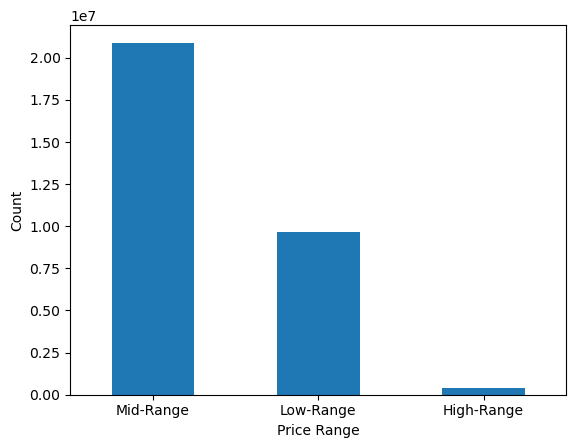

In [83]:
price_range = instacart_merged['price_range_loc'].value_counts().plot.bar()
plt.xticks(rotation=360)
plt.xlabel('Price Range')
plt.ylabel('Count')

- Plot a bar chart to identify popular products.

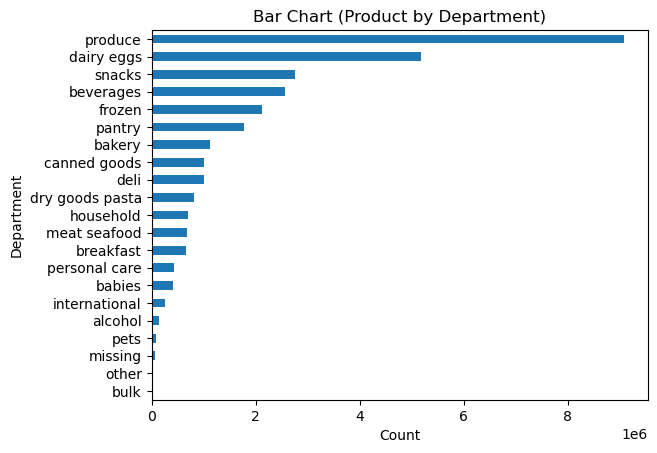

In [84]:
count_product_department = instacart_merged['department'].value_counts(ascending=True).plot.barh()
plt.xlabel('Count')
plt.ylabel('Department')
plt.title('Bar Chart (Product by Department)')
plt.show()

- Plot a bar chart to identify frequencies by loyalty flag customers.

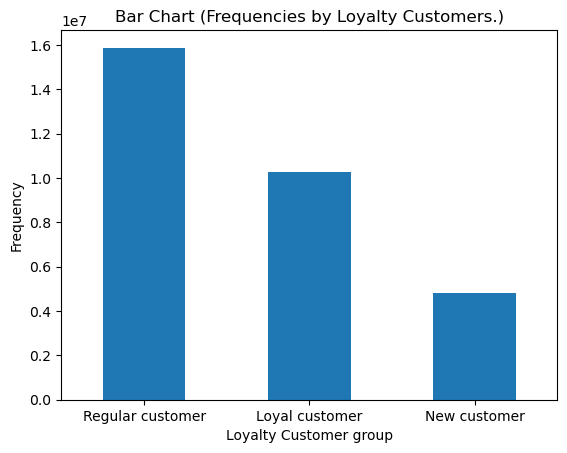

In [85]:
loyalty_flag_count = instacart_merged['loyalty_flag'].value_counts().plot.bar()
plt.xlabel('Loyalty Customer group')
plt.xticks(rotation=360)
plt.ylabel('Frequency')
plt.title('Bar Chart (Frequencies by Loyalty Customers.)')
plt.show()

- Loyal cutomer vs product price range

In [86]:
loyal_vs_price_range = pd.crosstab(instacart_merged['loyalty_flag'], instacart_merged['price_range_loc'], dropna = False)

In [87]:
loyal_vs_price_range

price_range_loc,High-Range,Low-Range,Mid-Range
loyalty_flag,,,
Loyal customer,119936,3214690,6949467
New customer,65927,1501288,3236480
Regular customer,212090,4958862,10705824


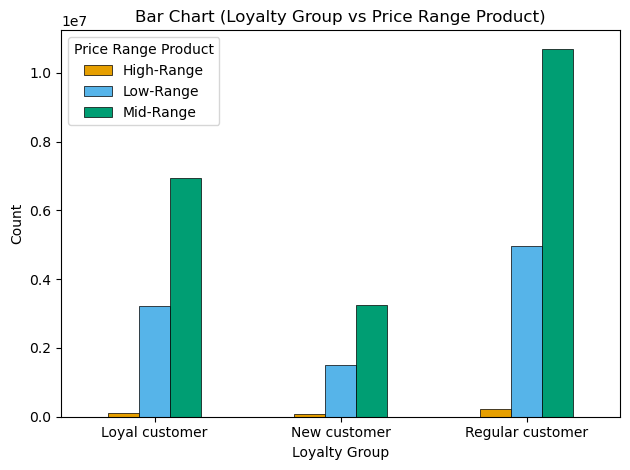

In [88]:
colors = ['#E69F00', '#56B4E9', '#009E73', '#F0E442']
loyal_vs_price_range = loyal_vs_price_range.plot.bar(edgecolor='black', color = colors, linewidth=0.5)
# Adding labels and title
plt.xlabel('Loyalty Group')
plt.xticks(rotation=360)
plt.ylabel('Count')
plt.title('Bar Chart (Loyalty Group vs Price Range Product)')
plt.legend(title='Price Range Product')
plt.tight_layout()  # Adjust layout

- Plot a bar chart to identify total product orders by region.

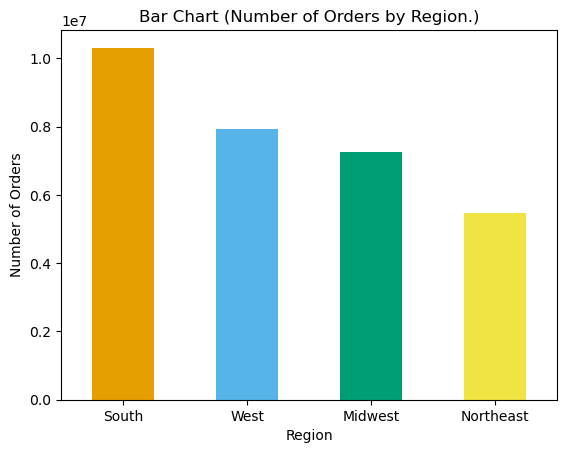

In [89]:
region_count = instacart_merged['Region'].value_counts().plot.bar(color = ['#E69F00', '#56B4E9', '#009E73', '#F0E442'])
plt.xlabel('Region')
plt.xticks(rotation=360)
plt.ylabel('Number of Orders')
plt.title('Bar Chart (Number of Orders by Region.)')
plt.show()

- Age group vs family status

In [90]:
age_vs_family_status = pd.crosstab(instacart_merged['Age_group'], instacart_merged['Family Status'], dropna = False)

In [91]:
age_vs_family_status

Family Status,divorced/widowed,living with parents and siblings,married,single
Age_group,,,,
Adult,0,0,5414851,1835065
Middle age adult,623313,0,9046762,2433835
Senior,2021958,0,6173586,0
Young,0,1481172,1108512,825510


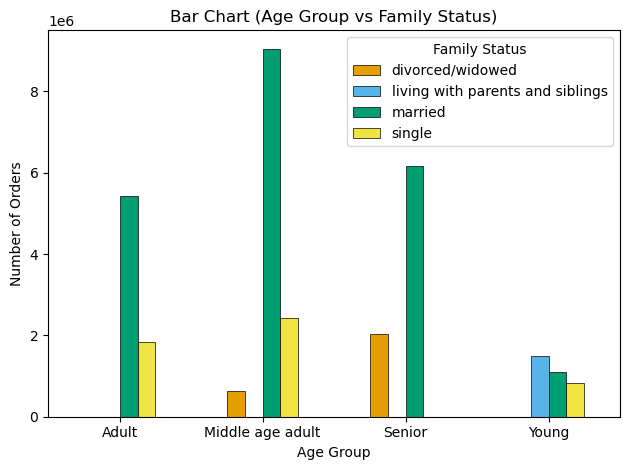

In [92]:
age_vs_family_status = age_vs_family_status.plot.bar(edgecolor='black', color = colors, linewidth=0.5)
# Adding labels and title
plt.xlabel('Age Group')
plt.xticks(rotation=360)
plt.ylabel('Number of Orders')
plt.title('Bar Chart (Age Group vs Family Status)')
plt.legend(title='Family Status')
plt.tight_layout()  # Adjust layout

- Pie chart proportion of regions

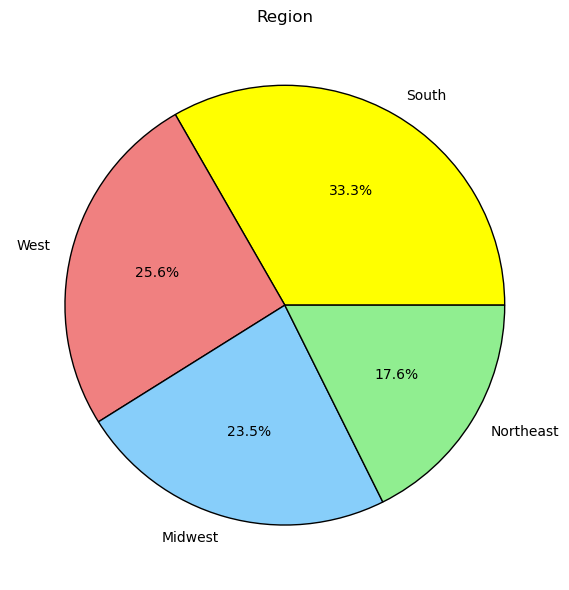

In [93]:
pie_region = instacart_cleaned['Region'].value_counts()
plt.figure(figsize=(6,6))
colors = ['yellow', 'lightcoral', 'lightskyblue', 'lightgreen']
pie_region = pie_region.plot.pie(autopct='%1.1f%%',wedgeprops={'edgecolor':'black'}, colors = colors)
plt.title('Region')
plt.ylabel('')
plt.tight_layout()
plt.show()

#### 9. Produce suitable charts to illustrate your results and export them in your project folder.

In [94]:
# Export all charts
region_vs_department.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', '4.10.5 region_vs_department.png'))
age_vs_region.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', '4.10.6 age_vs_region.png'))
age_vs_department.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', '4.10.7 age_vs_department.png'))
income_vs_region.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', '4.10.8 income_vs_region.png'))
income_vs_department.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', '4.10.9 income_vs_department.png'))
dependents_vs_region.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', '4.10.10 dependents_vs_region.png'))
dependents_vs_department.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', '4.10.11 dependents_vs_department.png'))
family_status_vs_region.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', '4.10.12 family_status_vs_region.png'))
family_status_vs_department.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', '4.10.13 family_status_vs_department.png'))
price_range.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', '4.10.14 price_range.png'))
count_product_department.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', '4.10.15 count_product_department.png'),bbox_inches='tight')
loyalty_flag_count.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', '4.10.16 loyalty_flag_count.png'))
loyal_vs_price_range.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', '4.10.17 loyal_vs_price_range.png'))
region_count.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', '4.10.18 region_count.png'))
age_vs_family_status.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', '4.10.19 age_vs_family_status.png'))
pie_region.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', '4.10.20 pie_region.png'))